In this Project, we have different features of machines and we want to process the data and do some cleaning methods to fill empty data cells, using numpy and pandas.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


# 1)

First of all we read the data from csv file to DataFrame named data using pandas function.

In [2]:
data = pd.read_csv("car_price_dataset.csv")
data

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,13495.0
1,2,alfa-romero stelvio,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,171.2,65.5,52.4,2823,six,152.0,154.0,19,26,16500.0
3,4,audi 100 ls,gas,176.6,66.2,54.3,2337,four,109.0,NaN,24,30,13950.0
4,5,audi 100ls,gas,176.6,66.4,54.3,2824,five,136.0,115.0,18,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),gas,188.8,68.9,55.5,2952,four,141.0,114.0,23,28,16845.0
201,202,volvo 144ea,gas,188.8,68.8,55.5,3049,four,141.0,160.0,19,25,19045.0
202,203,volvo 244dl,gas,188.8,68.9,55.5,3012,six,173.0,134.0,18,23,21485.0
203,204,volvo 246,diesel,188.8,68.9,55.5,3217,six,145.0,106.0,26,27,22470.0


This data frame contains 205 rows which means we have 205 different records. 
There is 13 columns wchich means we have 13 properties for each record.

I used head(8) and the result is returning top 8 rows of data frame. by using head() the default value is 5, then we would have have 5 rows of data.

In [3]:
data.head(8)

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,13495.0
1,2,alfa-romero stelvio,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,171.2,65.5,52.4,2823,six,152.0,154.0,19,26,16500.0
3,4,audi 100 ls,gas,176.6,66.2,54.3,2337,four,109.0,NaN,24,30,13950.0
4,5,audi 100ls,gas,176.6,66.4,54.3,2824,five,136.0,115.0,18,22,NaN
5,6,audi fox,gas,177.3,66.3,53.1,2507,five,136.0,110.0,19,25,15250.0
6,7,audi 100ls,gas,192.7,71.4,55.7,2844,five,136.0,110.0,19,25,17710.0
7,8,audi 5000,gas,192.7,71.4,55.7,2954,five,136.0,110.0,19,25,18920.0


tail(8) returns 8 last rows of data frame.

In [4]:
data.tail(8)

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
197,198,volvo 245,gas,188.8,67.2,57.5,3042,four,141.0,114.0,24,28,16515.0
198,199,volvo 264gl,gas,188.8,67.2,56.2,3045,four,130.0,162.0,17,22,18420.0
199,200,volvo diesel,gas,188.8,67.2,57.5,3157,four,130.0,162.0,17,22,18950.0
200,201,volvo 145e (sw),gas,188.8,68.9,55.5,2952,four,141.0,114.0,23,28,16845.0
201,202,volvo 144ea,gas,188.8,68.8,55.5,3049,four,141.0,160.0,19,25,19045.0
202,203,volvo 244dl,gas,188.8,68.9,55.5,3012,six,173.0,134.0,18,23,21485.0
203,204,volvo 246,diesel,188.8,68.9,55.5,3217,six,145.0,106.0,26,27,22470.0
204,205,volvo 264gl,gas,188.8,68.9,55.5,3062,four,141.0,114.0,19,25,22625.0


describe() Generate descriptive statistics of DataFrame columns.  
Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.  
percentiles: The percentiles to include in the output.  
include='all':All columns of the input will be included in the output. By default only numeric fields are returned.  
exclude= None:No black list of data types to omit from the result.  

In [5]:
data.describe()

,car_ID,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,191.000000,182.000000,205.000000,205.000000,185.000000
mean,103.000000,174.049268,65.907805,53.724878,2555.565854,125.418848,105.747253,25.219512,30.751220,13392.181984
std,59.322565,12.337289,2.145204,2.443522,520.680204,39.229587,40.288214,6.542142,6.886443,8235.838288
min,1.000000,141.100000,60.300000,47.800000,1488.000000,61.000000,52.000000,13.000000,16.000000,5118.000000
25%,52.000000,166.300000,64.100000,52.000000,2145.000000,97.000000,72.250000,19.000000,25.000000,7788.000000
50%,103.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,95.000000,24.000000,30.000000,10295.000000
75%,154.000000,183.100000,66.900000,55.500000,2935.000000,141.000000,121.000000,30.000000,34.000000,16503.000000
max,205.000000,208.100000,72.300000,59.800000,4066.000000,326.000000,288.000000,49.000000,54.000000,45400.000000


In [6]:
data.describe(percentiles=None, include='all', exclude=None)

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
count,205.000000,205,205,205.000000,205.000000,205.000000,205.000000,205,191.000000,182.000000,205.000000,205.000000,185.000000
unique,NaN,147,2,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota corolla,gas,NaN,NaN,NaN,NaN,four,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,185,NaN,NaN,NaN,NaN,159,NaN,NaN,NaN,NaN,NaN
mean,103.000000,NaN,NaN,174.049268,65.907805,53.724878,2555.565854,NaN,125.418848,105.747253,25.219512,30.751220,13392.181984
std,59.322565,NaN,NaN,12.337289,2.145204,2.443522,520.680204,NaN,39.229587,40.288214,6.542142,6.886443,8235.838288
min,1.000000,NaN,NaN,141.100000,60.300000,47.800000,1488.000000,NaN,61.000000,52.000000,13.000000,16.000000,5118.000000
25%,52.000000,NaN,NaN,166.300000,64.100000,52.000000,2145.000000,NaN,97.000000,72.250000,19.000000,25.000000,7788.000000
50%,103.000000,NaN,NaN,173.200000,65.500000,54.100000,2414.000000,NaN,119.000000,95.000000,24.000000,30.000000,10295.000000
75%,154.000000,NaN,NaN,183.100000,66.900000,55.500000,2935.000000,NaN,141.000000,121.000000,30.000000,34.000000,16503.000000


count: number of records which are non Null or NAN  
unique: distinct values in a column (used for object or categorical data)  
top: most common value  (used for object or categorical data)  
freq: the most common value’s frequency.  (used for object or categorical data)  
mean: mean or average of the values (used for numeric data)  
std: Standard deviation of each column  
min: min value of the column (used for numeric data)  
%: thats the same as median (used for numeric data)  
max: max value of column (used for numeric data)  

In [7]:
data.describe(include= ['int', 'float'])

,car_ID,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,191.000000,182.000000,205.000000,205.000000,185.000000
mean,103.000000,174.049268,65.907805,53.724878,2555.565854,125.418848,105.747253,25.219512,30.751220,13392.181984
std,59.322565,12.337289,2.145204,2.443522,520.680204,39.229587,40.288214,6.542142,6.886443,8235.838288
min,1.000000,141.100000,60.300000,47.800000,1488.000000,61.000000,52.000000,13.000000,16.000000,5118.000000
25%,52.000000,166.300000,64.100000,52.000000,2145.000000,97.000000,72.250000,19.000000,25.000000,7788.000000
50%,103.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,95.000000,24.000000,30.000000,10295.000000
75%,154.000000,183.100000,66.900000,55.500000,2935.000000,141.000000,121.000000,30.000000,34.000000,16503.000000
max,205.000000,208.100000,72.300000,59.800000,4066.000000,326.000000,288.000000,49.000000,54.000000,45400.000000


by setting include to 'int', that describes only int and float type properties.

And here is how we can get the descriptive statistics for only one column.

In [8]:
data['price'].describe()

count      185.000000
mean     13392.181984
std       8235.838288
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

# 2)

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage for each column.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          205 non-null    int64  
 1   CarName         205 non-null    object 
 2   fueltype        205 non-null    object 
 3   carlength       205 non-null    float64
 4   carwidth        205 non-null    float64
 5   carheight       205 non-null    float64
 6   curbweight      205 non-null    int64  
 7   cylindernumber  205 non-null    object 
 8   enginesize      191 non-null    float64
 9   horsepower      182 non-null    float64
 10  citympg         205 non-null    int64  
 11  highwaympg      205 non-null    int64  
 12  price           185 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 20.9+ KB


For Labeling datas and convert objects to numerical value, first we want to see all values of cylindernumber and fueltypes as object.  
.value_counts() function return a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [10]:
data["cylindernumber"].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [11]:
data["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

For labeling data, I replaced the objects with numerical values using .replace()  

In [12]:
cleanup= {"cylindernumber": {"two":2, "three":3, "four":4, "five":5, "six":6, "eight":8, "twelve":12 },
          "fueltype": {"gas": 0, "diesel":1 }} 
data= data.replace(cleanup)
data

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,0,168.8,64.1,48.8,2548,4,130.0,111.0,21,27,13495.0
1,2,alfa-romero stelvio,0,168.8,64.1,48.8,2548,4,130.0,111.0,21,27,16500.0
2,3,alfa-romero Quadrifoglio,0,171.2,65.5,52.4,2823,6,152.0,154.0,19,26,16500.0
3,4,audi 100 ls,0,176.6,66.2,54.3,2337,4,109.0,NaN,24,30,13950.0
4,5,audi 100ls,0,176.6,66.4,54.3,2824,5,136.0,115.0,18,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),0,188.8,68.9,55.5,2952,4,141.0,114.0,23,28,16845.0
201,202,volvo 144ea,0,188.8,68.8,55.5,3049,4,141.0,160.0,19,25,19045.0
202,203,volvo 244dl,0,188.8,68.9,55.5,3012,6,173.0,134.0,18,23,21485.0
203,204,volvo 246,1,188.8,68.9,55.5,3217,6,145.0,106.0,26,27,22470.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          205 non-null    int64  
 1   CarName         205 non-null    object 
 2   fueltype        205 non-null    int64  
 3   carlength       205 non-null    float64
 4   carwidth        205 non-null    float64
 5   carheight       205 non-null    float64
 6   curbweight      205 non-null    int64  
 7   cylindernumber  205 non-null    int64  
 8   enginesize      191 non-null    float64
 9   horsepower      182 non-null    float64
 10  citympg         205 non-null    int64  
 11  highwaympg      205 non-null    int64  
 12  price           185 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 20.9+ KB


as we can see, coluumn cylindernumber and fueltype are changed to numerical values.  
by using .info() we can see Dtype of these two rows.  
I had also tested following commands but assigned values were not the same as the string values. So I prefered to use replace method.  
data["cylindernumber"] = data["cylindernumber"].astype('category')  
data["cylindernumber"] = data["cylindernumber"].cat.codes


# 3)

I used data.any with parameter axis=1 for check at least one True in row by DataFrame.isna with boolean indexing.  
So the output is all the rows with at least one NAN.

In [14]:
data_nan= data[data.isna().any(axis=1)]
data_nan

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
3,4,audi 100 ls,0,176.6,66.2,54.3,2337,4,109.0,NaN,24,30,13950.000
4,5,audi 100ls,0,176.6,66.4,54.3,2824,5,136.0,115.0,18,22,NaN
9,10,audi 5000s (diesel),0,178.2,67.9,52.0,3053,5,131.0,NaN,16,22,17859.167
11,12,bmw 320i,0,176.8,64.8,54.3,2395,4,108.0,NaN,23,29,16925.000
17,18,bmw x3,0,197.0,70.9,56.3,3505,6,NaN,182.0,15,20,36880.000
18,19,chevrolet impala,0,141.1,60.3,53.2,1488,3,61.0,NaN,47,53,5151.000
21,22,dodge rampage,0,157.3,63.8,50.8,1876,4,NaN,68.0,37,41,5572.000
25,26,dodge colt hardtop,0,157.3,63.8,50.6,1989,4,90.0,NaN,31,38,6692.000
29,30,dodge coronet custom (sw),0,173.2,66.3,50.2,2811,4,156.0,145.0,19,24,NaN
31,32,honda civic cvcc,0,144.6,63.9,50.8,1819,4,92.0,76.0,31,38,NaN


In [15]:
data['enginesize'].mean()

125.41884816753927

In [16]:
cond= data['price'].isna()
cond

0      False
1      False
2      False
3      False
4       True
       ...  
200    False
201    False
202    False
203    False
204    False
Name: price, Length: 205, dtype: bool

Here we want to replace all NAN cells with their mean values except for price column.  
by refering to the output of data.info(), we know that we have NAN in enginesize and horsepower colums. so I replace these with their mean value of the column.

In [17]:
data['horsepower'].fillna(value=data['horsepower'].mean(), inplace=True)
data['enginesize'].fillna(value=data['enginesize'].mean(), inplace=True)
data

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,0,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,13495.0
1,2,alfa-romero stelvio,0,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,0,171.2,65.5,52.4,2823,6,152.0,154.000000,19,26,16500.0
3,4,audi 100 ls,0,176.6,66.2,54.3,2337,4,109.0,105.747253,24,30,13950.0
4,5,audi 100ls,0,176.6,66.4,54.3,2824,5,136.0,115.000000,18,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),0,188.8,68.9,55.5,2952,4,141.0,114.000000,23,28,16845.0
201,202,volvo 144ea,0,188.8,68.8,55.5,3049,4,141.0,160.000000,19,25,19045.0
202,203,volvo 244dl,0,188.8,68.9,55.5,3012,6,173.0,134.000000,18,23,21485.0
203,204,volvo 246,1,188.8,68.9,55.5,3217,6,145.0,106.000000,26,27,22470.0


in 4th row we had NaN for price cell and now we still have that. and other NaN values are replaced.
Advantages and disadvantages of Replacing the missing value with the field mean (for numeric variables) or the
mode (for categorical variables):  
The mean may not always be the best choice for what constitutes a “typical” value.     
For example, One senario is that the mean may be greater that 90s percentile. then it's not the perfect choice.  
Also, if many missing values are replaced with the mean, the resulting confidence levels for statistical inference will be overoptimistic, since measures of spread will be artificially reduced and will caused in reduction of the variance.  
The advantages are:  
Imputing the mean preserves the mean of the observed data.So if the data are missing completely at random, the estimate of the mean remains unbiased.  
Also by imputing the mean, we are able to have the same sample size as we originally had.

I record the NaN price rows in NanPriceData which are 205-185=20 rows.

In [18]:
NanPriceData= data[data['price'].isna()]
NanPriceData

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
4,5,audi 100ls,0,176.6,66.4,54.3,2824,5,136.000000,115.0,18,22,NaN
29,30,dodge coronet custom (sw),0,173.2,66.3,50.2,2811,4,156.000000,145.0,19,24,NaN
31,32,honda civic cvcc,0,144.6,63.9,50.8,1819,4,92.000000,76.0,31,38,NaN
52,53,mazda rx2 coupe,0,159.1,64.2,54.1,1905,4,91.000000,68.0,31,38,NaN
53,54,mazda rx-4,0,166.8,64.2,54.1,1945,4,91.000000,68.0,31,38,NaN
59,60,mazda 626,0,177.8,66.5,53.7,2385,4,122.000000,84.0,26,32,NaN
62,63,mazda rx-4,0,177.8,66.5,55.5,2410,4,122.000000,84.0,26,32,NaN
67,68,buick electra 225 custom,1,190.9,70.3,56.5,3515,5,183.000000,123.0,22,25,NaN
78,79,mitsubishi outlander,0,157.3,64.4,50.8,2004,4,92.000000,68.0,31,38,NaN
84,85,mitsubishi mirage g4,0,173.2,66.3,50.2,2926,4,156.000000,145.0,19,24,NaN


In [19]:
data= data[data['price'].notna()]
data

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,0,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,13495.0
1,2,alfa-romero stelvio,0,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,0,171.2,65.5,52.4,2823,6,152.0,154.000000,19,26,16500.0
3,4,audi 100 ls,0,176.6,66.2,54.3,2337,4,109.0,105.747253,24,30,13950.0
5,6,audi fox,0,177.3,66.3,53.1,2507,5,136.0,110.000000,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),0,188.8,68.9,55.5,2952,4,141.0,114.000000,23,28,16845.0
201,202,volvo 144ea,0,188.8,68.8,55.5,3049,4,141.0,160.000000,19,25,19045.0
202,203,volvo 244dl,0,188.8,68.9,55.5,3012,6,173.0,134.000000,18,23,21485.0
203,204,volvo 246,1,188.8,68.9,55.5,3217,6,145.0,106.000000,26,27,22470.0


to ensure that the code is fine:  
in info we have seen that there is 185 rows which containe non NaN value for their price cell.  
and here we omited rows with Nan prices and number of remained rows are: 185   
So now in "data" we are recording non Nan price samples, which other NAN values are replaced with mean.

# 4)

 Here we have number of machines with different number of cylinders.

In [20]:
data["cylindernumber"].value_counts()

4     143
6      22
5       9
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

# 5)

by using value_count we can have the details of machines with given conditions.

In [21]:
data[(data["horsepower"] > 100) &
     (data["fueltype"] == 0) &
     (data["citympg"]<15)].value_counts()

car_ID  CarName                          fueltype  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  horsepower  citympg  highwaympg  price  
50      jaguar xk                        0         191.7      70.6      47.8       3950        12              326.000000  262.000000  13       17          36000.0    1
74      buick century special            0         208.1      71.7      56.7       3900        8               125.418848  105.747253  14       16          40960.0    1
75      buick regal sport coupe (turbo)  0         199.2      72.0      55.4       3715        8               304.000000  184.000000  14       16          45400.0    1
dtype: int64

# 6)

Here I used the same method as before and get the mean price of gas and diesel machines by using vectorization.

In [22]:
tic=time.time()
mean= data[data["fueltype"]==0]["price"].mean()
toc=time.time()
print("Mean price of gas machine: ", mean)
print("Time of calculating mean using Vectorization: ", toc-tic)

Mean price of gas machine:  13170.738957831325
Time of calculating mean using Vectorization:  0.00420832633972168


In [23]:
tic=time.time()
mean= data[data["fueltype"]==1]["price"].mean()
toc=time.time()
print("Mean price of diesel machine: ", mean)
print("Time of calculating mean using Vectorization: ", toc-tic)

Mean price of diesel machine:  15326.894736842105
Time of calculating mean using Vectorization:  0.0020003318786621094


# 7)

In [24]:
data["fueltype"].value_counts()

0    166
1     19
Name: fueltype, dtype: int64

use for loop for calculating mean price of gas machine

In [25]:
priceSum=0
gasCount=0
temp=0;
tic=time.time()
for i in range (len(data)):
    if(data['fueltype'].iloc[i] == 0):
        gasCount= gasCount+1;
        priceSum= priceSum + data['price'].iloc[i]
GasMean=priceSum/gasCount
toc=time.time()
print("Mean price of gas machine: ", GasMean)
print("Time of calculating mean by using loop: ", toc-tic)

Mean price of gas machine:  13170.738957831325
Time of calculating mean by using loop:  0.04221534729003906


use for loop for calculating mean price of diesel machine


In [26]:
priceSum=0
gasCount=0
temp=0;
tic=time.time()
for i in range (len(data)):
    if(data['fueltype'].iloc[i] == 1):
        gasCount= gasCount+1;
        priceSum= priceSum + data['price'].iloc[i]
GasMean=priceSum/gasCount
toc=time.time()
print("Mean price of gas machine: ", GasMean)
print("Time of calculating mean by using loop: ", toc-tic)

Mean price of gas machine:  15326.894736842105
Time of calculating mean by using loop:  0.002337217330932617


Time of calculation using vectorization is less that loop through the data.  
for example time of calculating mean price for gas machines:   
vectorization: 0.005923032760620117  
for loop: 0.024325132369995117

# 8)

A histogram is a representation of the distribution of data.   
used data.drop to exclude car_ID because that is object and it's invalid for plotting  
used figsize = (20,20) to make histogram bigger 
used hist() to display histogram of data

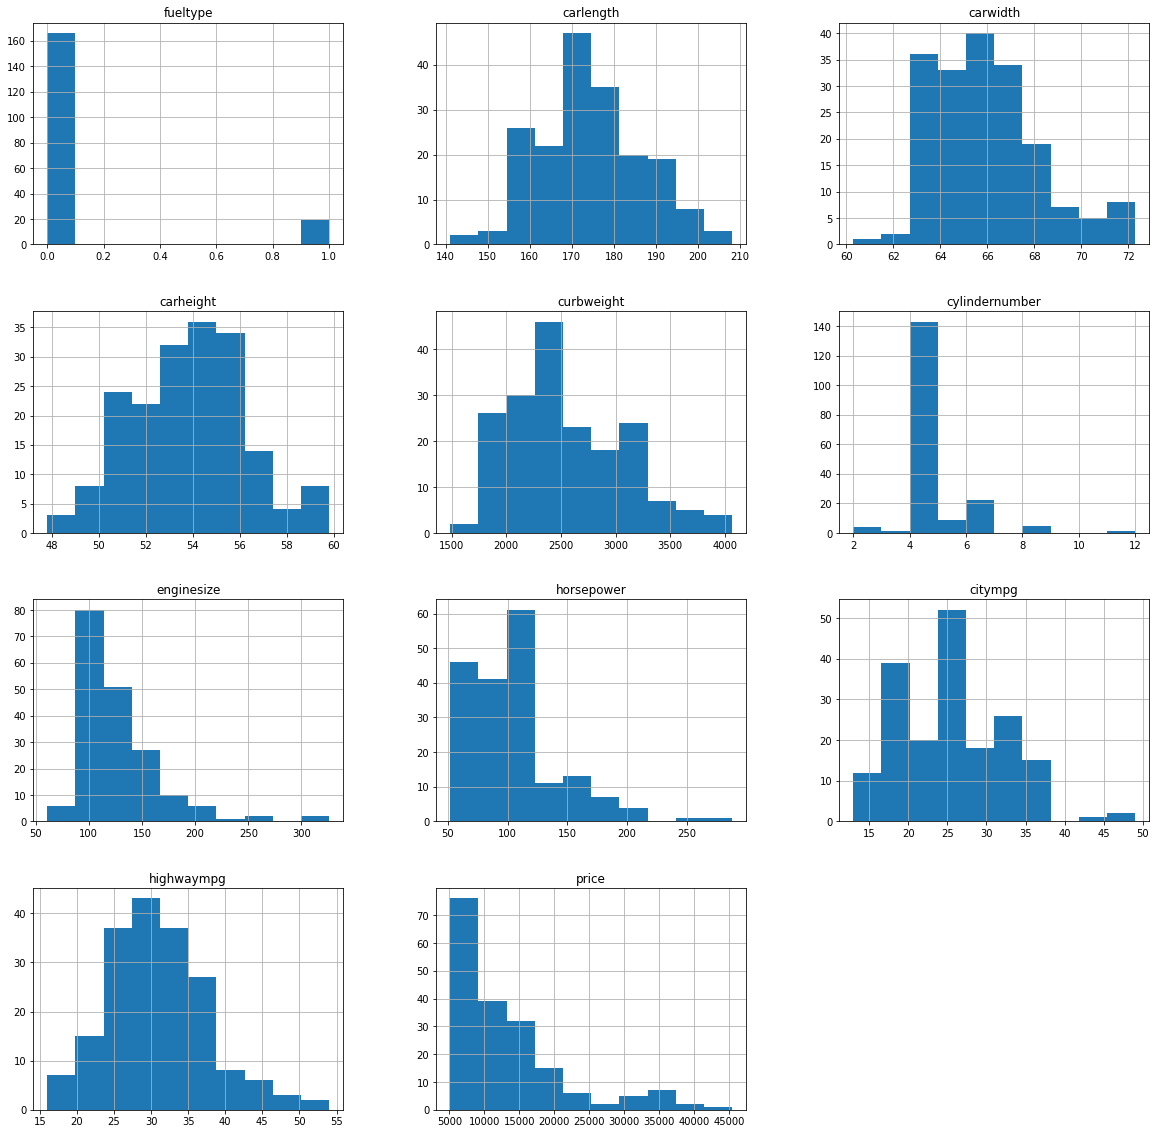

In [27]:
h=data.drop(['car_ID'],axis=1).hist(figsize = (20,20)) 

# 9)

drop the non numerical columns:

In [28]:
numData= data.drop(['CarName','fueltype', 'car_ID'],axis=1)
numData

,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,13495.0
1,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,16500.0
2,171.2,65.5,52.4,2823,6,152.0,154.000000,19,26,16500.0
3,176.6,66.2,54.3,2337,4,109.0,105.747253,24,30,13950.0
5,177.3,66.3,53.1,2507,5,136.0,110.000000,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,2952,4,141.0,114.000000,23,28,16845.0
201,188.8,68.8,55.5,3049,4,141.0,160.000000,19,25,19045.0
202,188.8,68.9,55.5,3012,6,173.0,134.000000,18,23,21485.0
203,188.8,68.9,55.5,3217,6,145.0,106.000000,26,27,22470.0


normalizing prices:

In [29]:
numData['price']= (numData['price']-numData['price'].mean())/numData['price'].std()
numData

,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,0.012484
1,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,0.377353
2,171.2,65.5,52.4,2823,6,152.0,154.000000,19,26,0.377353
3,176.6,66.2,54.3,2337,4,109.0,105.747253,24,30,0.067731
5,177.3,66.3,53.1,2507,5,136.0,110.000000,19,25,0.225577
...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,55.5,2952,4,141.0,114.000000,23,28,0.419243
201,188.8,68.8,55.5,3049,4,141.0,160.000000,19,25,0.686368
202,188.8,68.9,55.5,3012,6,173.0,134.000000,18,23,0.982634
203,188.8,68.9,55.5,3217,6,145.0,106.000000,26,27,1.102234


# 10)

plot for each atribute for all machines.

Text(0, 0.5, 'highwaympg')

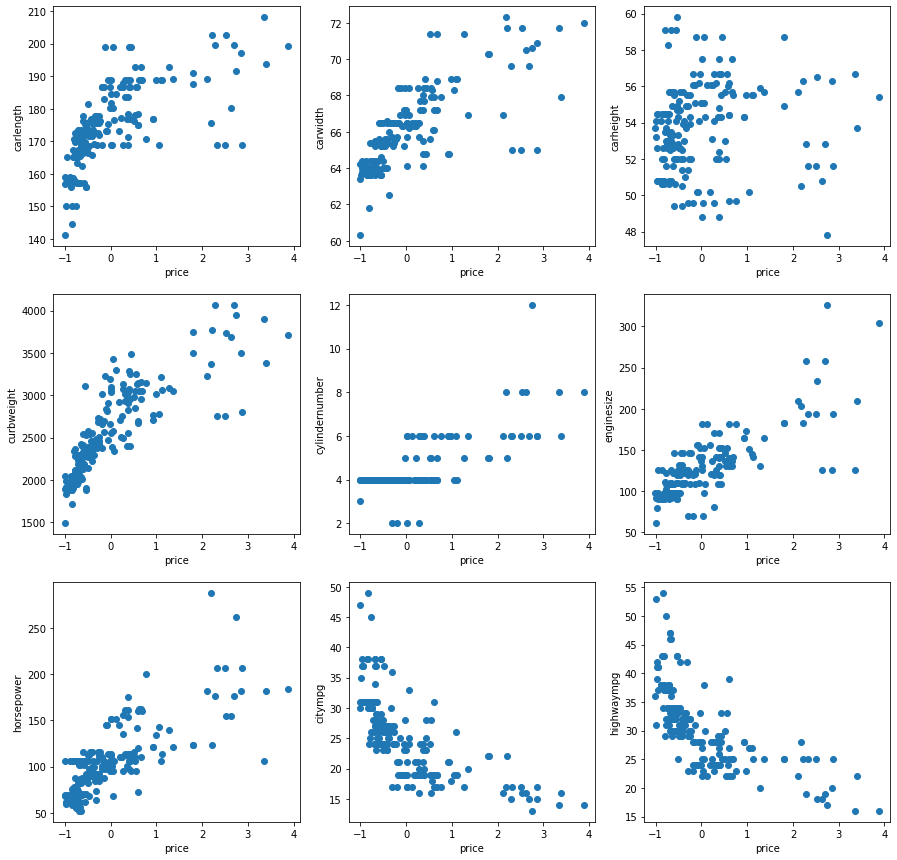

In [30]:
plt.figure(figsize=(15, 15))
plt.subplot(331)
plt.scatter('price','carlength', data= numData)
plt.xlabel('price')
plt.ylabel('carlength')
plt.subplot(332)
plt.scatter('price','carwidth', data= numData)
plt.xlabel('price')
plt.ylabel('carwidth')
plt.subplot(333)
plt.scatter('price','carheight', data= numData)
plt.xlabel('price')
plt.ylabel('carheight')
plt.subplot(334)
plt.scatter('price','curbweight', data= numData)
plt.xlabel('price')
plt.ylabel('curbweight')
plt.subplot(335)
plt.scatter('price','cylindernumber', data= numData)
plt.xlabel('price')
plt.ylabel('cylindernumber')
plt.subplot(336)
plt.scatter('price','enginesize', data= numData)
plt.xlabel('price')
plt.ylabel('enginesize')
plt.subplot(337)
plt.scatter('price','horsepower', data= numData)
plt.xlabel('price')
plt.ylabel('horsepower')
plt.subplot(338)
plt.scatter('price','citympg', data= numData)
plt.xlabel('price')
plt.ylabel('citympg')
plt.subplot(339)
plt.scatter('price','highwaympg', data= numData)
plt.xlabel('price')
plt.ylabel('highwaympg')

Based on the ploted figures, Some attributes are most likely to have perfect matsched line.  
for Example HorsePower or curbweight coulb be our choise.  
fur sure citympg and highwaymog have negetiv effects on price. by increasing the price, they become smaller.  
carheight has large variance. and it seems that the price of cars do not depends on their height since most dots are placed around one vertical line.

I used .corr method from pandas library to calculate the coordination of columns.  
and by adding 'price' that only returns the coordination between price and other attributes.  
scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.   
maximum number of corr and closer to 1 is better and shows the better match and most correlation.  
then I choose curbweight as most related attribute to the price of machine.

In [31]:
numData.corr()['price']

carlength         0.683104
carwidth          0.755490
carheight         0.111783
curbweight        0.833602
cylindernumber    0.724678
enginesize        0.794026
horsepower        0.769182
citympg          -0.687151
highwaympg       -0.698832
price             1.000000
Name: price, dtype: float64

# 11)

making new DataFrame based on enginesize and price column

In [32]:
new= {'curbweight':numData['curbweight'],'price':numData['price']}
newData= pd.DataFrame(data=new)
newData

,curbweight,price
0,2548,0.012484
1,2548,0.377353
2,2823,0.377353
3,2337,0.067731
5,2507,0.225577
...,...,...
200,2952,0.419243
201,3049,0.686368
202,3012,0.982634
203,3217,1.102234


# 12)

we can measure the accuracy of our hypothesis functionby by using a cost function.  
here by using np.polyfit we can find the theta values  
Our objective is to get the best possible line. The best possible line will be such so that the average squared vertical distances of the scattered points from the line will be the least.
Ideally, the line should pass through all the points of our training data set. In such a case, the value of MSE will be zero.

In [33]:
y=newData['price']
x=newData['curbweight']
t= np.polyfit(x,y,1)
h= t[0]*x + t[1]
MSE = np.square(np.subtract(y,h)).mean()
MSE

0.30345776161379706

# 13)

as figure shows, this line is the best match for our data

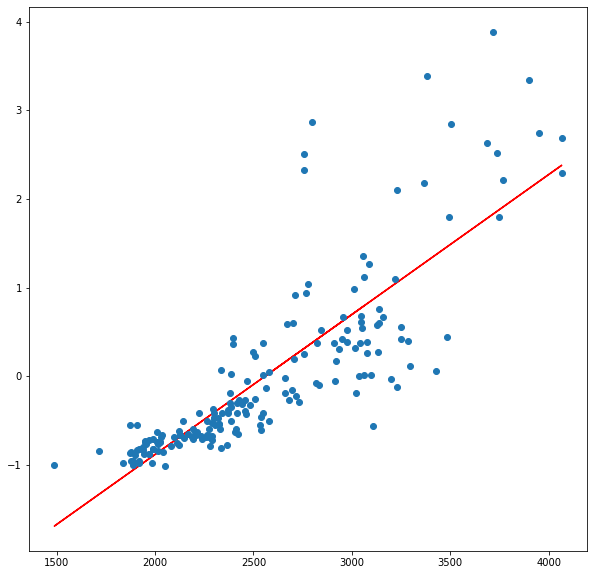

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(x, h, 'r') 
plt.plot(x, y, 'o')

# 14)

Now We calculate the NaN prices using the linear hypothesis function.

In [35]:
final= {'car_ID':NanPriceData['car_ID'],
        'price':t[0]*NanPriceData['curbweight']+t[1],
        'curbweight':NanPriceData['curbweight']}
finalData= pd.DataFrame(data=final)
finalData

,car_ID,price,curbweight
4,5,0.421088,2824
29,30,0.400571,2811
31,32,-1.165029,1819
52,53,-1.029301,1905
53,54,-0.966172,1945
59,60,-0.271753,2385
62,63,-0.232298,2410
67,68,1.511641,3515
78,79,-0.873057,2004
84,85,0.582066,2926


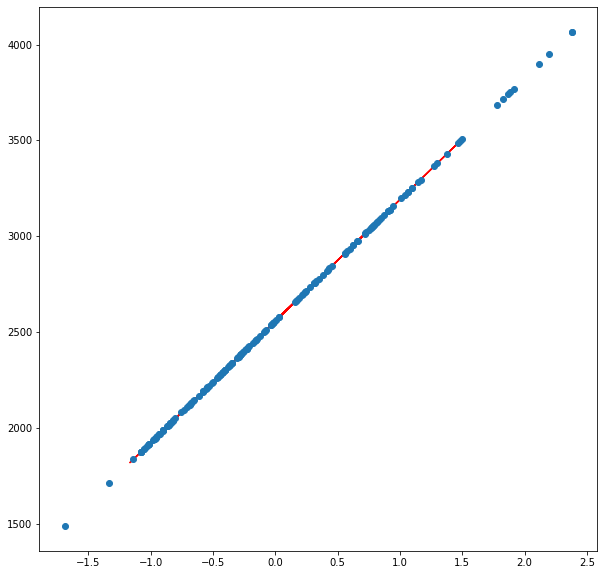

In [36]:
plt.figure(figsize=(10, 10))
plt.plot(finalData['price'], finalData['curbweight'], 'r')
plt.plot(h, x, 'o')

Refrences:
https://pandas.pydata.org/  
Discovering Knoledge in Data by Larose (for explanations and report)